In [1]:
import os
import numpy as np
import cv2

path1 = './face/'
path2 = './non-face/'

face_list = os.listdir(path1)
nonface_list = os.listdir(path2)

def readimg(file_path):
    img = cv2.imread(file_path, 0)
    height, width = img.shape
    vector_size = height*width
    img_vector = img.reshape(1, vector_size)
    return img_vector


face_cube = readimg(path1+face_list[0])

for line in face_list:
    tmp_vector = readimg(path1+line)
    face_cube = np.append(face_cube, tmp_vector, axis = 0)


In [2]:
import matplotlib.pyplot as plt
def face_show(index):
    img = face_cube[index,:].reshape(32,32)
    plt.imshow(img,cmap = 'gray')

def nonface_show(index):
    img = nonface_cube[index,:].reshape(32,32)
    plt.imshow(img,cmap = 'gray')

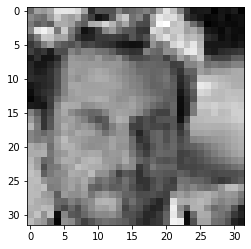

In [3]:
face_show(300)

In [4]:
nonface_cube = readimg(path2+nonface_list[0])
for line in nonface_list:
    tmp_vector = readimg(path2+line)
    nonface_cube = np.append(nonface_cube, tmp_vector, axis = 0)

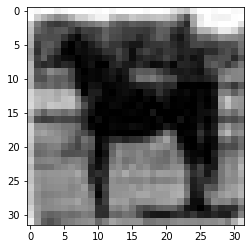

In [5]:
nonface_show(200)

In [6]:
img_set = np.append(face_cube, nonface_cube, axis = 0)

In [7]:
img_set.shape

(11994, 1024)

In [8]:
label = np.zeros(len(img_set))

In [9]:
# 1 for face , 0 for nonface
label[:len(face_cube)] = 1

In [10]:
label[len(face_cube):len(nonface_cube)] = -1

In [36]:
Normal_pairs = [(img_set[i], label[i]) for i in range(len(img_set))]

In [12]:
import random
random.shuffle(Normal_pairs)

In [37]:
Training_set = Normal_pairs[:int(len(img_set)*0.5)]
Test_set = Normal_pairs[int(len(img_set)*0.5)+1:int(len(img_set))]

In [38]:
len(Training_set)

5997

In [39]:
len(Test_set)

5996

In [70]:
Weight = np.random.rand(1024)
Bias = 0

In [41]:
Weight

array([0.75566354, 0.9962233 , 0.31920416, ..., 0.24209666, 0.49076008,
       0.01137817])

In [42]:
Training_set[0][0]

array([  8,  16,  24, ..., 107, 108, 138], dtype=uint8)

In [43]:
Training_label = [Training_set[i][1] for i in range(len(Training_set))]
Training_data = [Training_set[i][0] for i in range(len(Training_set))]

In [44]:
Training_data = np.array(Training_data)
Training_label = np.array(Training_label)

In [45]:
Test_label = np.array([Test_set[i][1] for i in range(len(Test_set))])
Test_data = np.array([Test_set[i][0] for i in range(len(Test_set))])

In [46]:
Weight = Training_label[21]*Training_data[21]+Weight

In [47]:
Weight

array([38.75566354, 48.9962233 , 38.31920416, ..., 43.24209666,
       47.49076008, 38.01137817])

In [73]:
size = 5996

In [49]:
def training_SGD(input_data, label, size, learning_rate = 1.0, train_num = 1000):
    global Weight, Bias
    x = input_data
    y = label
    for round in range(train_num):
        for i in range(size):
            prediction = np.sign(np.dot(x[i],Weight)+Bias)
            if y[i] * prediction <= 0:
                Weight = Weight + learning_rate * y[i] * x[i]
                Bias = Bias + learning_rate * y[i]
        if round % 10 == 0:
            learning_rate *= 0.9
            accuracy = compute_accuracy(x, y, size, Weight, Bias)
            print('the round of', round, 'accuracy', accuracy)
            print('Weight:', Weight, 'Bias:', Bias)
            
def compute_accuracy(x, y, size, Weight, Bias):
    
    prediction = np.sign(np.dot(x, Weight)+Bias)
    count = 0
    for i in range(size):
        if (prediction[i] > 0):
            count = count + 1
    return (count+0.0)/size

In [50]:
training_SGD(Training_data, Training_label, size, learning_rate = 1.0, train_num = 1000)

the round of 0 accuracy 0.0045030020013342225
Weight: [-119.24433646 -113.0037767  -128.68079584 ...   43.24209666   36.49076008
   31.01137817] Bias: -1.0
the round of 10 accuracy 0.9729819879919946
Weight: [ 274.95566354 -245.3037767  -377.08079584 ...  990.94209666  992.29076008
 1190.21137817] Bias: 2.6
the round of 20 accuracy 0.9839893262174784
Weight: [ 888.12566354  343.5662233   239.32920416 ... 1598.44209666 1551.19076008
 1915.97137817] Bias: 3.4100000000000006
the round of 30 accuracy 0.9994996664442962
Weight: [ 963.21266354  426.6722233   326.80920416 ... 1581.67509666 1524.21776008
 1885.35337817] Bias: 4.139000000000001
the round of 40 accuracy 0.9994996664442962
Weight: [ 963.21266354  426.6722233   326.80920416 ... 1581.67509666 1524.21776008
 1885.35337817] Bias: 4.139000000000001
the round of 50 accuracy 0.9994996664442962
Weight: [ 963.21266354  426.6722233   326.80920416 ... 1581.67509666 1524.21776008
 1885.35337817] Bias: 4.139000000000001
the round of 60 accura

the round of 490 accuracy 0.9994996664442962
Weight: [ 963.21266354  426.6722233   326.80920416 ... 1581.67509666 1524.21776008
 1885.35337817] Bias: 4.139000000000001
the round of 500 accuracy 0.9994996664442962
Weight: [ 963.21266354  426.6722233   326.80920416 ... 1581.67509666 1524.21776008
 1885.35337817] Bias: 4.139000000000001
the round of 510 accuracy 0.9994996664442962
Weight: [ 963.21266354  426.6722233   326.80920416 ... 1581.67509666 1524.21776008
 1885.35337817] Bias: 4.139000000000001
the round of 520 accuracy 0.9994996664442962
Weight: [ 963.21266354  426.6722233   326.80920416 ... 1581.67509666 1524.21776008
 1885.35337817] Bias: 4.139000000000001
the round of 530 accuracy 0.9994996664442962
Weight: [ 963.21266354  426.6722233   326.80920416 ... 1581.67509666 1524.21776008
 1885.35337817] Bias: 4.139000000000001
the round of 540 accuracy 0.9994996664442962
Weight: [ 963.21266354  426.6722233   326.80920416 ... 1581.67509666 1524.21776008
 1885.35337817] Bias: 4.13900000

the round of 980 accuracy 0.9994996664442962
Weight: [ 963.21266354  426.6722233   326.80920416 ... 1581.67509666 1524.21776008
 1885.35337817] Bias: 4.139000000000001
the round of 990 accuracy 0.9994996664442962
Weight: [ 963.21266354  426.6722233   326.80920416 ... 1581.67509666 1524.21776008
 1885.35337817] Bias: 4.139000000000001


In [51]:
def show_training(index):
    img = Training_data[index].reshape(32,32)
    plt.imshow(img,cmap = 'gray')
    print(Training_label[index])

1.0


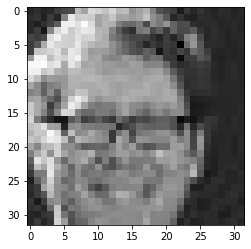

In [52]:
show_training(21)

In [53]:
compute_accuracy(Test_data, Test_label, size, Weight, Bias)

0.9804869913275517

In [54]:
def leastSquareMulti(x,y,n):
    X = [np.sum(x**i) for i in range(2*n+1)]
    Y = np.array([[np.sum(y*x**i)] for i in range(n+1)])
    S = np.array([X[i:i+n+1] for i in range(n+1)])
    return np.linalg.solve(S,Y)

In [57]:
result = leastSquareMulti(Training_data, Training_label, 1024)

ValueError: operands could not be broadcast together with shapes (5997,) (5997,1024) 

In [55]:
Training_label[:1000]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [68]:
def adaline(input_data, label, size, learning_rate = 0.01, train_num = 1000):
    global Weight, Bias
    x = input_data
    y = label
    for round in range(train_num):
        errors = np.zeros(size)
        for i in range(size):
            prediction = np.sign(np.dot(x[i],Weight)+Bias)
            if y[i] * prediction <= 0:
                errors[i]= y[i]-prediction
                
        Weight = Weight + learning_rate * x.T.dot(errors)
        Bias = Bias + learning_rate * errors.sum()
        
        if round % 10 == 0:
            learning_rate *= 0.9
            accuracy = compute_accuracy(x, y, size, Weight, Bias)
            print('the round of', round, 'accuracy', accuracy)
            print('Weight:', Weight, 'Bias:', Bias) 

In [71]:
adaline(Training_data, Training_label, size, learning_rate = 1.0, train_num = 100)

the round of 0 accuracy 0.0
Weight: [-841.97918754 -839.40917811 -855.42291236 ... -351.92653504 -409.50574906
 -389.93931964] Bias: -8.0
the round of 10 accuracy 1.0
Weight: [1311039.42081246 1294726.79082189 1268202.17708764 ... 1090505.67346496
 1112226.29425094 1142930.46068036] Bias: 10714.599999999993
the round of 20 accuracy 1.0
Weight: [1304219.22081246 1287922.79082189 1261268.57708764 ... 1087654.47346496
 1108905.29425094 1139771.46068037] Bias: 10649.799999999997
the round of 30 accuracy 1.0
Weight: [1298081.04081246 1281799.19082189 1255028.33708764 ... 1085088.39346496
 1105916.39425094 1136928.36068037] Bias: 10591.479999999994
the round of 40 accuracy 1.0
Weight: [1292556.67881246 1276287.95082189 1249412.12108764 ... 1082778.92146496
 1103226.38425094 1134369.57068037] Bias: 10538.992
the round of 50 accuracy 1.0
Weight: [1287584.75301246 1271327.83482189 1244357.52668764 ... 1080700.39666496
 1100805.37525094 1132066.65968037] Bias: 10491.752799999997
the round of 60 

In [61]:
Training_data.shape

(5997, 1024)

In [74]:
compute_accuracy(Test_data, Test_label, size, Weight, Bias)

1.0

array([1269553.8602498 , 1253339.77078313, 1226026.83285767, ...,
       1073162.54125824, 1092025.48685107, 1123715.05851951])